In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Učitavanje dataseta
data = pd.read_csv('dataset/Pulsar_cleaned.csv')

# Deljenje podataka na atribute i ciljne promenljive
X = data.drop('Class', axis=1)
y = data['Class']

# Balansiranje skupa podataka
class_0 = data[data.Class == 0]
class_1 = data[data.Class == 1]
class_0_downsampled = class_0.sample(len(class_1), random_state=42)
balanced_data = pd.concat([class_0_downsampled, class_1], axis=0)

# Podela balansiranog skupa podataka na trening i test skup
X_balanced = balanced_data.drop('Class', axis=1)
y_balanced = balanced_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Inicijalizacija modela
model = KNeighborsClassifier(n_neighbors=5)

# Treniranje modela na balansiranom skupu podataka
model.fit(X_train, y_train)

# Predviđanje na trening skupu
y_train_pred = model.predict(X_train)

# Predviđanje na test skupu
y_test_pred = model.predict(X_test)

# Izračunavanje metrika za trening skup
train_accuracy_balanced = accuracy_score(y_train, y_train_pred)
train_recall_balanced = recall_score(y_train, y_train_pred)
train_precision_balanced = precision_score(y_train, y_train_pred)
train_f1_balanced = f1_score(y_train, y_train_pred)

# Izračunavanje metrika za test skup
test_accuracy_balanced = accuracy_score(y_test, y_test_pred)
test_recall_balanced = recall_score(y_test, y_test_pred)
test_precision_balanced = precision_score(y_test, y_test_pred)
test_f1_balanced = f1_score(y_test, y_test_pred)

#PREDIKCIJA GENERISANIH PODATAKA
generated_data = pd.read_csv('dataset/synthetic_data.csv')
X_generated = generated_data.drop('Class', axis=1)
y_generated = generated_data['Class']
y_generated_pred = model.predict(X_generated)

# Izračunavanje metrika za generisani skup podataka
accuracy_generated = accuracy_score(y_generated, y_generated_pred)
recall_generated = recall_score(y_generated, y_generated_pred)
precision_generated = precision_score(y_generated, y_generated_pred)
f1_generated = f1_score(y_generated, y_generated_pred)

# Tabelarni prikaz metrika
results_balanced = pd.DataFrame({
    'Skup podataka': ['Trening', 'Test', 'Generisani'],
    'Tačnost': [train_accuracy_balanced, test_accuracy_balanced, accuracy_generated],
    'Odziv': [train_recall_balanced, test_recall_balanced, recall_generated],
    'Preciznost': [train_precision_balanced, test_precision_balanced, precision_generated],
    'F-mera': [train_f1_balanced, test_f1_balanced, f1_generated]
})
print(results_balanced)

  Skup podataka   Tačnost     Odziv  Preciznost    F-mera
0       Trening  0.817073  0.802372    0.835391  0.818548
1          Test  0.806452  0.818182    0.762712  0.789474
2    Generisani  0.510000  0.432584    0.348416  0.385965


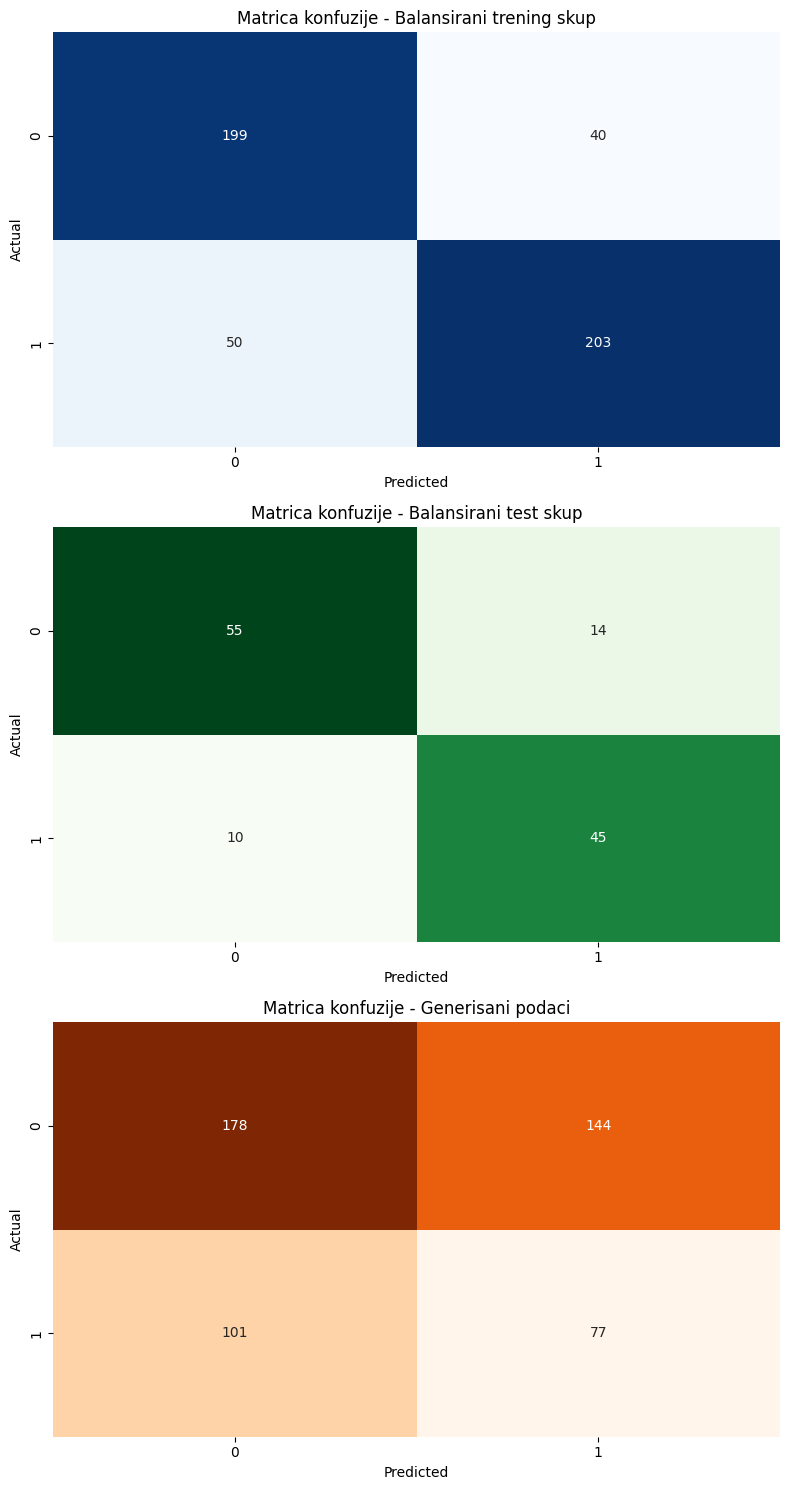

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Izračunavanje matrice konfuzije za balansirani trening skup
cm_train_balanced = confusion_matrix(y_train, y_train_pred)

# Izračunavanje matrice konfuzije za balansirani test skup
cm_test_balanced = confusion_matrix(y_test, y_test_pred)

# Plotovanje matrice konfuzije za balansirani trening skup
plt.figure(figsize=(8, 15))

plt.subplot(3, 1, 1)
sns.heatmap(cm_train_balanced, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matrica konfuzije - Balansirani trening skup')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotovanje matrice konfuzije za balansirani test skup
plt.subplot(3, 1, 2)
sns.heatmap(cm_test_balanced, annot=True, fmt='g', cmap='Greens', cbar=False)
plt.title('Matrica konfuzije - Balansirani test skup')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Izračunavanje matrice konfuzije za generisani skup podataka
cm_generated = confusion_matrix(y_generated, y_generated_pred)

# Plotovanje matrice konfuzije za generisani skup podataka
plt.subplot(3, 1, 3)
sns.heatmap(cm_generated, annot=True, fmt='g', cmap='Oranges', cbar=False)
plt.title('Matrica konfuzije - Generisani podaci')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


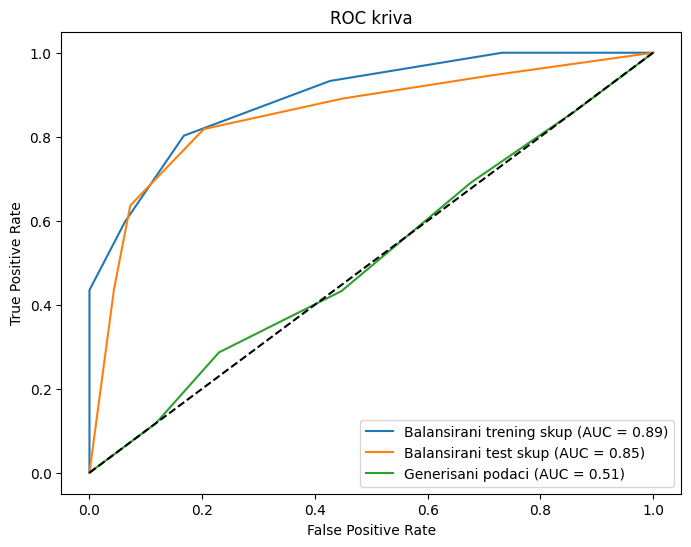

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Izračunavanje verovatnoća pripadnosti pozitivnoj klasi za balansirani trening i test skup
y_train_probs_balanced = model.predict_proba(X_train)[:, 1]
y_test_probs_balanced = model.predict_proba(X_test)[:, 1]

# Izračunavanje vrednosti za ROC krivu
train_fpr_balanced, train_tpr_balanced, _ = roc_curve(y_train, y_train_probs_balanced)
test_fpr_balanced, test_tpr_balanced, _ = roc_curve(y_test, y_test_probs_balanced)

# Izračunavanje AUC vrednosti
train_auc_balanced = auc(train_fpr_balanced, train_tpr_balanced)
test_auc_balanced = auc(test_fpr_balanced, test_tpr_balanced)

#za generisane podatke
# Izračunavanje verovatnoća pripadnosti pozitivnoj klasi za generisane podatke
y_generated_probs = model.predict_proba(X_generated)[:, 1]

# Izračunavanje vrednosti za ROC krivu za generisane podatke
generated_fpr, generated_tpr, _ = roc_curve(y_generated, y_generated_probs)

# Izračunavanje AUC vrednosti za generisane podatke
generated_auc = auc(generated_fpr, generated_tpr)

# Prikaz ROC krive za balansirane trening, test skupove i generisane podatke
plt.figure(figsize=(8, 6))
plt.plot(train_fpr_balanced, train_tpr_balanced, label='Balansirani trening skup (AUC = {:.2f})'.format(train_auc_balanced))
plt.plot(test_fpr_balanced, test_tpr_balanced, label='Balansirani test skup (AUC = {:.2f})'.format(test_auc_balanced))
plt.plot(generated_fpr, generated_tpr, label='Generisani podaci (AUC = {:.2f})'.format(generated_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kriva')
plt.legend()
plt.show()
